# Text Representation
- also known as text extraction ,  feature extraction from text, text vectorization.
- Convert text into numbers.

Why text extraction ??
- Computers can’t understand raw text directly, the text must be converted into numerical features.


---
Why do we need it ??
- To make our model work good as it need good feature. [ Garbage in garbage out ]


---
What is the core idea ??
- The number we get after representation of text, should convey sentiment of the text properly.


---
What are techniques ??
- Machine learning approach
   * One Hot Encoding
   * Bag of Words
   * ngrams
   * TfIdf
   * Custom features

- Deep learning approach
   * Word2vec










### Installing and importing required libraries

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import os
import opendatasets as od
import numpy as np
import pandas as pd

We will be using [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), available on kaggle.

Loading the dataset.

In [ ]:
od.download('https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')

Skipping, found downloaded files in "./imdb-dataset-of-50k-movie-reviews" (use force=True to force download)


In [ ]:
os.listdir('imdb-dataset-of-50k-movie-reviews')

['IMDB Dataset.csv']

In [ ]:
df = pd.read_csv('./imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv', nrows=1000, low_memory=False)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
df_copy=df.copy()

### Applying Text Preprocessing -

##### Converting into lower case

In [ ]:
df['review'] = df['review'].str.lower()

##### Remove HTML tags

In [ ]:
import re
def remove_html(text):
  exp = re.compile('<.*?>')
  return exp.sub(r'', text)

In [ ]:
df['review']=df['review'].apply(remove_html)

##### Remove links

In [ ]:
def remove_url(text):
  exp = re.compile(r'https?://\S+|www\.\S+')
  return exp.sub(r'', text)

In [ ]:
df['review']=df['review'].apply(remove_url)

##### Remove punctuations

In [ ]:
import string
pun = string.punctuation

In [ ]:
def remove_pun(s):
  return str(s).translate(str.maketrans('','',pun))

In [ ]:
df['review']=df['review'].apply(remove_pun)

#### Replace short words

In [ ]:
t="""
A3=Anytime, Anywhere, Anyplace
ADIH=Another Day In Hell
AFK=Away From Keyboard
AFAIK=As Far As I Know
ASAP=As Soon As Possible
ASL=Age, Sex, Location
ATK=At The Keyboard
ATM=At The Moment
BAE=Before Anyone Else
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRUH=Bro
BRT=Be Right There
BSAAW=Big Smile And A Wink
BTW=By The Way
BWL=Bursting With Laughter
CSL=Can’t Stop Laughing
CU=See You
CUL8R=See You Later
CYA=See You
DM=Direct Message
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FIMH=Forever In My Heart
FOMO=Fear Of Missing Out
FR=For Real
FWIW=For What It's Worth
FYP=For You Page
FYI=For Your Information
G9=Genius
GAL=Get A Life
GG=Good Game
GMTA=Great Minds Think Alike
GN=Good Night
GOAT=Greatest Of All Time
GR8=Great!
HBD=Happy Birthday
IC=I See
ICQ=I Seek You
IDC=I Don’t Care
IDK=I Don't Know
IFYP=I Feel Your Pain
ILU=I Love You
ILY=I Love You
IMHO=In My Honest/Humble Opinion
IMU=I Miss You
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
IYKYK=If You Know, You Know
JK=Just Kidding
KISS=Keep It Simple, Stupid
L=Loss
L8R=Later
LDR=Long Distance Relationship
LMK=Let Me Know
LMAO=Laughing My A** Off
LOL=Laughing Out Loud
LTNS=Long Time No See
M8=Mate
MFW=My Face When
MID=Mediocre
MRW=My Reaction When
MTE=My Thoughts Exactly
NVM=Never Mind
NRN=No Reply Necessary
NPC=Non-Player Character
OIC=Oh I See
OP=Overpowered
PITA=Pain In The A**
POV=Point Of View
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A** Off
RN=Right Now
SK8=Skate
STATS=Your Sex And Age
SUS=Suspicious
TBH=To Be Honest
TFW=That Feeling When
THX=Thank You
TIME=Tears In My Eyes
TLDR=Too Long, Didn’t Read
TNTL=Trying Not To Laugh
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
W=Win
W8=Wait...
WB=Welcome Back
WTF=What The F**k
WTG=Way To Go!
WUF=Where Are You From?
WYD=What You Doing?
WYWH=Wish You Were Here
ZZZ=Sleeping, Bored, Tired
"""
slangs = dict(line.split("=", 1) for line in t.strip().split("\n"))

In [ ]:
def chat(text):
  new=[]
  for word in text.split():
    if word.upper() in slangs:
      new.append(slangs[word.upper()])
    else:
      new.append(word)
  return " ".join(new)

In [ ]:
df['review']=df['review'].apply(chat)

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the tears in my eyes of...,positive


##### Remove emojis

In [ ]:
import re

def remove_emoji(text):
    emojis = re.compile(
        "["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    return emojis.sub(r'', text)

In [ ]:
df['review']=df['review'].apply(remove_emoji)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the tears in my eyes of...,positive


### Common Terms used:
- Corpus
- Vocabulary
- Document
- Word

##### **Corpus** (C)
- Combination of all words in dataset.

In [ ]:
corpus = [token for tokens in df['review'] for token in tokens]

In [ ]:
len(corpus)

1250313

##### **Vocabulary** (V)
- Number of **unique words** that makes corpus.


In [ ]:
vocab = set(corpus)
len(vocab)

60

##### **Document** (D)
- A piece of text (such as a sentence, paragraph, or full document)

##### **Word** (W)
- Individual word present in document.
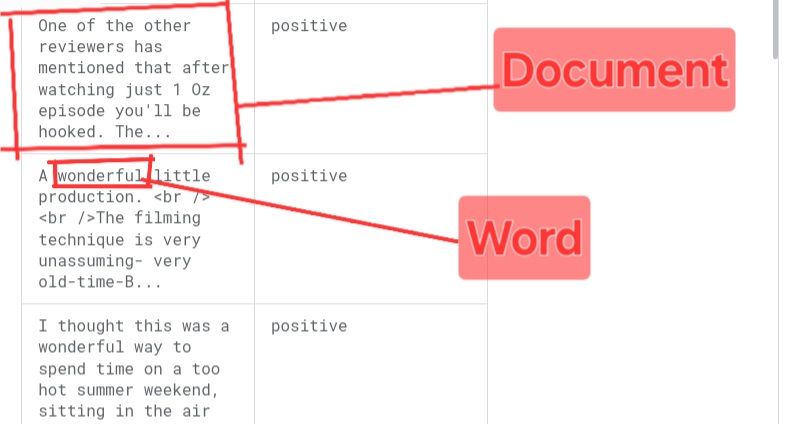

## One Hot Encoding
Each unique word in the vocabulary is represented as a binary(0 or 1) vector:

- The length of the vector equals the size of the vocabulary.

- Each word has a unique position (index) in this vector that is set to 1, and all other positions are 0.

Suppose we have a small vocabulary:
| Word | Index |
| ---- | ----- |
| cat  | 0     |
| dog  | 1     |
| rat  | 2     |


Now, we represent each word as a vector of size 3 (since there are 3 words):

| Word | One-hot vector |
| ---- | -------------- |
| cat  | [1, 0, 0]      |
| dog  | [0, 1, 0]      |
| rat  | [0, 0, 1]      |


#### Advantages

- Simple and easy to implement.
- Unambiguous representation — every word is distinct.

#### Disadvantages

- High dimensionality: For large vocabularies (say 50,000 words), each vector is 50,000-dimensional.
- Sparse representation
- No semantic meaning: “dog” and “cat” are equally distant from each other as “dog” and “car” — there’s no notion of similarity.

### Using Pandas Library

In [ ]:
df1= df.head(5)
ohe = pd.get_dummies(df1, columns=['review', 'sentiment'])
ohe = ohe.astype(int)
ohe.head()

,review_a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,review_basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents descent dialogs as for the shots with jake just ignore them,review_i thought this was a wonderful way to spend tears in my eyes on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,review_one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being tur

### Using OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['review']])
encoded = pd.DataFrame(encoded)
encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bag of Words
Represent a document by counting the occurrences of each word, while ignoring grammar and word order, but keeping multiplicity (frequency).

Suppose you have two sentences:
 ```
"I love NLP"
"I love machine learning"
```
**Step 1:** Build the Vocabulary
List all unique words across all documents:


```
["I", "love", "NLP", "machine", "learning"]
```

**Step 2:** Encode Each Document
Count how many times each word appears in each document:
| Document                      | I | love | NLP | machine | learning |
| ----------------------------- | - | ---- | --- | ------- | -------- |
|  ("I love NLP")              | 1 | 1    | 1   | 0       | 0        |
|  ("I love machine learning") | 1 | 1    | 0   | 1       | 1        |

So, **document 1** becomes [1, 1, 1, 0, 0] and **document 2** becomes [1, 1, 0, 1, 1].

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
bow = cv.fit_transform(df['review'])

In [ ]:
len(cv.vocabulary_)

21393

In [ ]:
cv.vocabulary_

{'one': 13308,
 'of': 13212,
 'the': 18994,
 'other': 13468,
 'reviewers': 15869,
 'has': 8623,
 'mentioned': 11951,
 'that': 18982,
 'after': 655,
 'watching': 20646,
 'just': 10371,
 'oz': 13641,
 'episode': 6381,
 'youll': 21295,
 'be': 1892,
 'hooked': 9102,
 'they': 19068,
 'are': 1274,
 'right': 15941,
 'as': 1369,
 'this': 19109,
 'is': 9999,
 'exactly': 6573,
 'what': 20801,
 'happened': 8545,
 'with': 20999,
 'methe': 12015,
 'first': 7196,
 'thing': 19081,
 'struck': 18268,
 'me': 11830,
 'about': 379,
 'was': 20614,
 'its': 10075,
 'brutality': 2700,
 'and': 1001,
 'unflinching': 19951,
 'scenes': 16475,
 'violence': 20408,
 'which': 20831,
 'set': 16861,
 'in': 9525,
 'from': 7596,
 'word': 21081,
 'go': 8022,
 'trust': 19683,
 'not': 13039,
 'show': 17095,
 'for': 7390,
 'faint': 6832,
 'hearted': 8722,
 'or': 13401,
 'timid': 19284,
 'pulls': 14953,
 'no': 12941,
 'punches': 14963,
 'regards': 15478,
 'to': 19323,
 'drugs': 5821,
 'sex': 16888,
 'hardcore': 8569,
 'classi

In [ ]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#new word handle
cv.transform(['hello, one']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

#### Advantages of using BOW

- Simple and easy to implement.
- Works well for basic text classification (e.g., spam detection, sentiment analysis).
- Useful as a baseline model.

#### Disadvantages of using BOW

- Ignores word order and context.
- Vocabulary can be huge — large feature vectors for big corpora.
- Doesn’t capture semantic meaning.

## Ngrams
A contiguous sequence of n items (usually words or characters) taken from a text.

The “n” stands for how many tokens you group together:
1. Unigram (unigram) → single word
2. Bigram (bigram) → pair of consecutive words
3. Trigram (trigram) → sequence of three consecutive words

Example Sentence

```
“Machine learning is fun and powerful.”
```
| **Type**                                    | **n** | **Extracted n-grams**                                              |
| ------------------------------------------- | ----- | ------------------------------------------------------------------ |
| **Unigrams (1-grams)**                      | 1     | Machine, learning, is, fun, and, powerful                          |
| **Bigrams (2-grams)**                       | 2     | Machine learning, learning is, is fun, fun and, and powerful       |
| **Trigrams (3-grams)**                      | 3     | Machine learning is, learning is fun, is fun and, fun and powerful |
| **4-grams**                                 | 4     | Machine learning is fun, learning is fun and, is fun and powerful  |


In [ ]:
cv = CountVectorizer(ngram_range=(2,3))

In [ ]:
bow = cv.fit_transform(df['review'])

In [ ]:
cv.vocabulary_

{'one of': 188100,
 'of the': 182840,
 'the other': 255815,
 'other reviewers': 191640,
 'reviewers has': 212253,
 'has mentioned': 108195,
 'mentioned that': 160720,
 'that after': 243782,
 'after watching': 6337,
 'watching just': 292391,
 'just oz': 142295,
 'oz episode': 193930,
 'episode youll': 78252,
 'youll be': 310041,
 'be hooked': 33585,
 'hooked they': 118456,
 'they are': 264320,
 'are right': 24657,
 'right as': 212802,
 'as this': 27800,
 'this is': 267348,
 'is exactly': 131421,
 'exactly what': 81103,
 'what happened': 295812,
 'happened with': 107177,
 'with methe': 302841,
 'methe first': 161101,
 'first thing': 90930,
 'thing that': 265570,
 'that struck': 245983,
 'struck me': 237057,
 'me about': 158960,
 'about oz': 2373,
 'oz was': 193934,
 'was its': 290158,
 'its brutality': 138296,
 'brutality and': 43514,
 'and unflinching': 20007,
 'unflinching scenes': 282546,
 'scenes of': 217650,
 'of violence': 184206,
 'violence which': 287535,
 'which set': 298073,
 '

In [ ]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

#### Dimensionality of bigram increases rapidly in comparison to unigram

In [ ]:
len(cv.vocabulary_)

311501

### Benefits of ngram:
 - Captures semantic of sentences
 - Easy to implement

### Disadvantages of ngram:
 - Slows down the algorithm as unigram -> bigram -> trigram
 - Can't handle **out of vocabulary**

## Tf-Idf
- stands for Term Frequency–Inverse Document Frequency.
- It’s a numerical statistic that reflects how important a word is to a document within a collection (corpus).

The Two Components
1. Term Frequency (TF)
Measures how often a term 𝑡 appears in a document d.

```
TF(t,d) = Number of times term 𝑡 appears in 𝑑
          __________________________________
               Total number of terms in 𝑑
```
This gives a local importance of a term within a specific document.

2. Inverse Document Frequency (IDF)
Measures how common or rare a term is across the entire corpus.

```
IDF(t) = log ( N / (1+DF(t))
```
Where:
- N = total number of documents
- DF(t) = number of documents containing term 𝑡

The log helps scale down the effect of very frequent words.
Adding 1 in the denominator prevents division by zero.

Let’s say we have 3 simple documents:
| Document | Text                              |
| -------- | --------------------------------- |
| **D1**   | "I love NLP"                      |
| **D2**   | "I love machine learning"         |
| **D3**   | "NLP is part of machine learning" |

**Step 1.** Compute Term Frequency (TF)
| Term | D1          | D2      | D3          |
| ---- | ----------- | ------- | ----------- |
| NLP  | 1/3 = 0.333 | 0/4 = 0 | 1/6 = 0.167 |


---


**Step 2.** Compute Document Frequency (DF)
How many documents contain “NLP”?

- D1 → yes
- D2 → no
- D3 → yes

So:
    DF(NLP) = 2
Total documents, N=3.


---

**Step 3.** Compute Inverse Document Frequency (IDF)
    IDF(NLP) = log(3/(1+2)) = log(1) = 0

Uh-oh — that’s zero, which would wipe out the term.
To avoid this, libraries like scikit-learn often use a smoothed version:

    IDF(t) = log((1+N) / (1+DF(t))) + 1

    IDF(NLP)=log((1+3) / (1+2)) + 1 = log(1.33)+1≈1.29

---

**Step 4.** Compute TF-IDF
| Term | TF(D1) | TF(D2) | TF(D3) | IDF  | TF-IDF(D1) | TF-IDF(D2) | TF-IDF(D3) |
| ---- | ------ | ------ | ------ | ---- | ---------- | ---------- | ---------- |
| NLP  | 0.333  | 0      | 0.167  | 1.29 | 0.43       | 0          | 0.22       |

---

**Interpretation**

- Highest TF-IDF: D1 (0.43) → “NLP” is very important there.
- Medium: D3 (0.22) → It appears, but the document is longer and contains other technical words.
- Zero: D2 → Doesn’t contain “NLP.”

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
documents = [
      "I love machine learning and natural language processing",
                "Machine learning is amazing for data analysis",
                              "Natural language processing helps computers understand humans"
                                          ]
tfidf_matrix = tfidf.fit_transform(documents).toarray()
tfidf_matrix

array([[0.        , 0.        , 0.45212331, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34385143,
        0.34385143, 0.45212331, 0.34385143, 0.34385143, 0.34385143,
        0.        ],
       [0.40301621, 0.40301621, 0.        , 0.        , 0.40301621,
        0.40301621, 0.        , 0.        , 0.40301621, 0.        ,
        0.30650422, 0.        , 0.30650422, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.41756662, 0.        ,
        0.        , 0.41756662, 0.41756662, 0.        , 0.31757018,
        0.        , 0.        , 0.        , 0.31757018, 0.31757018,
        0.41756662]])

In [ ]:
tfidf.idf_
tfidf.get_feature_names_out()

array(['amazing', 'analysis', 'and', 'computers', 'data', 'for', 'helps',
       'humans', 'is', 'language', 'learning', 'love', 'machine',
       'natural', 'processing', 'understand'], dtype=object)